In [1]:
from pymongo import MongoClient  # Import MongoClient for MongoDB connection
import pandas as pd  # Import pandas for data handling


In [11]:
# Create a class named user
class User:
    def __init__(self, age, gender, total_income, utilities, entertainment, school_fees, shopping, healthcare):
        self.age = age
        self.gender = gender
        self.total_income = total_income
        self.utilities = utilities
        self.entertainment = entertainment
        self.school_fees = school_fees
        self.shopping = shopping
        self.healthcare = healthcare


In [12]:
from pymongo import MongoClient
import pandas as pd

# MongoDB connection
client = MongoClient('mongodb://localhost:27017/')  # Ensure your MongoDB server is running
db = client['survey_db']
collection = db['responses']

# Fetching the data
data = pd.DataFrame(list(collection.find()))

# Check the fetched data
print(data.head())


                        _id  Age Gender  Total Income  Utilities  \
0  67185711ec8ad0d689c1558c   38   Male      750000.0    25000.0   

   Entertainment  School Fees  Shopping  Healthcare  
0       100000.0     100000.0   75000.0     50000.0  


In [14]:
# Print the columns of the DataFrame
print(data.columns.tolist())


['_id', 'Age', 'Gender', 'Total Income', 'Utilities', 'Entertainment', 'School Fees', 'Shopping', 'Healthcare']


In [15]:
# Loop through the collected data
for index, row in data.iterrows():
    user = User(
        age=row['Age'],  # Use the correct column name
        gender=row['Gender'],
        total_income=row['Total Income'],
        utilities=row['Utilities'],
        entertainment=row['Entertainment'],
        school_fees=row['School Fees'],
        shopping=row['Shopping'],
        healthcare=row['Healthcare']
    )
    users.append(user)

# Convert the list of User objects into a DataFrame
user_data = pd.DataFrame([{
    'age': user.age,
    'gender': user.gender,
    'total_income': user.total_income,
    'utilities': user.utilities,
    'entertainment': user.entertainment,
    'school_fees': user.school_fees,
    'shopping': user.shopping,
    'healthcare': user.healthcare
} for user in users])

# Save the DataFrame to a CSV file
user_data.to_csv('survey_responses.csv', index=False)
print("User data processed and saved successfully.")


User data processed and saved successfully.


In [16]:
# Load the CSV file into a DataFrame
loaded_data = pd.read_csv('survey_responses.csv')

# Display the loaded data
print(loaded_data.head())


   age gender  total_income  utilities  entertainment  school_fees  shopping  \
0   38   Male      750000.0    25000.0       100000.0     100000.0   75000.0   

   healthcare  
0     50000.0  


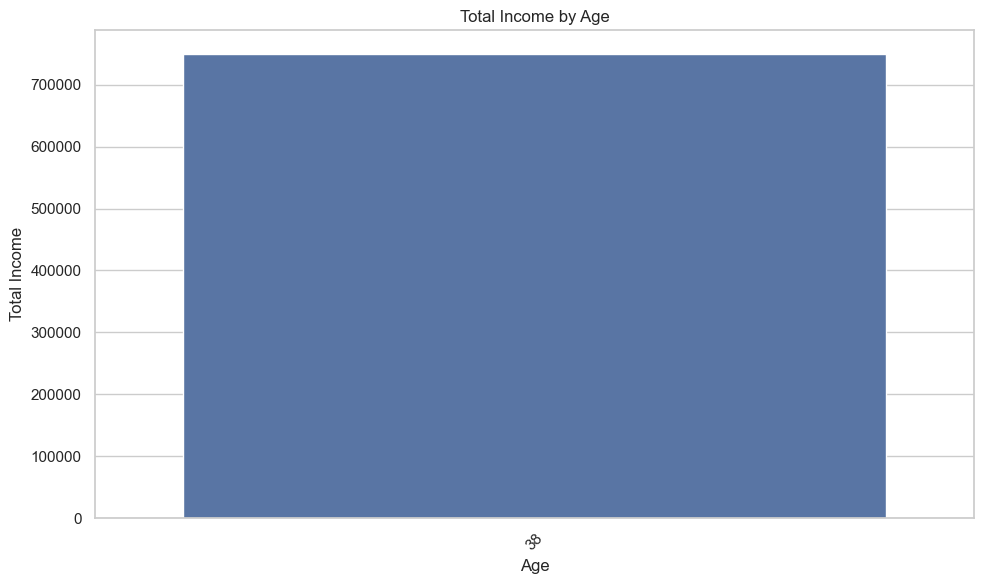

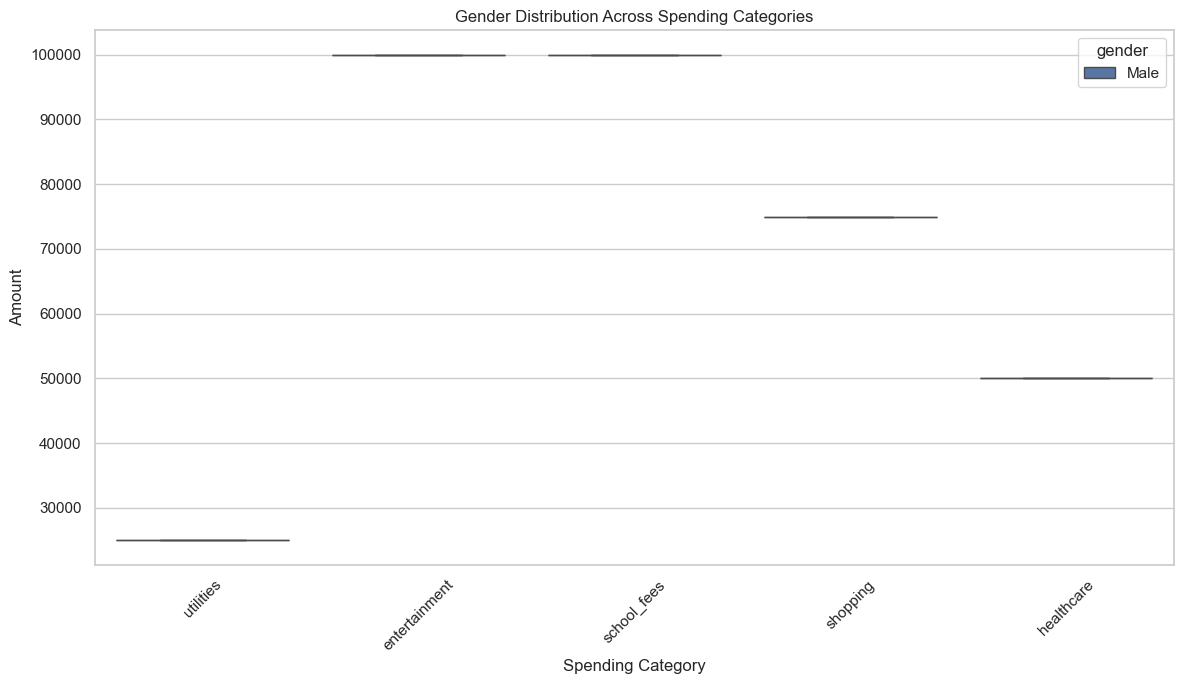

Charts saved successfully for PowerPoint presentation.


In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
user_data = pd.read_csv('survey_responses.csv')

# Set the style for seaborn
sns.set(style="whitegrid")

# 1. Show ages with the highest income
plt.figure(figsize=(10, 6))
# Group by age and sum total income, then reset index for proper DataFrame structure
income_by_age = user_data.groupby('age')['total_income'].sum().reset_index()
sns.barplot(x='age', y='total_income', data=income_by_age)
plt.title('Total Income by Age')
plt.xlabel('Age')
plt.ylabel('Total Income')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the figure
plt.savefig('total_income_by_age.png')
plt.show()  # Display the figure in the notebook

# 2. Show gender distribution across spending categories
spending_categories = ['utilities', 'entertainment', 'school_fees', 'shopping', 'healthcare']
melted_data = user_data.melt(id_vars=['gender'], value_vars=spending_categories, 
                              var_name='Spending Category', value_name='Amount')

plt.figure(figsize=(12, 7))
sns.boxplot(x='Spending Category', y='Amount', hue='gender', data=melted_data)
plt.title('Gender Distribution Across Spending Categories')
plt.xlabel('Spending Category')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the figure
plt.savefig('gender_distribution_spending_categories.png')
plt.show()  # Display the figure in the notebook

print("Charts saved successfully for PowerPoint presentation.")


In [1]:
from werkzeug.utils import quote as url_quote
